In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
# from sklearn.datasets import fetch_
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

import seaborn as sns
sns.set(style="white")

import joblib
from sklearn import svm

In [2]:
import joblib
train_data = joblib.load('/home/huy/face_recog/encoded_data/aug5_train/features.joblib')

In [3]:
X_, y_ = zip(*train_data)

In [4]:
NUM_CLASS = 15
NUM_SAMPLE = 200

In [5]:
dataset = {}
for i,v in enumerate(X_):
    if y_[i] not in dataset:
        dataset[y_[i]] = []
    dataset[y_[i]].append(v)

In [21]:
from numpy.random import default_rng
rng = default_rng()
chosen_ones = rng.choice(79, size=NUM_CLASS, replace=False)

In [32]:
def demension_reduce(X, y):
    time_start = time.time()
    pca = PCA(n_components=50)
    X = pca.fit_transform(X, y)
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X,y)
    X_2d = tsne_results
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    data = {'x1': X_2d[:, 0], 'x2': X_2d[:, 1], 'y':y}
    df = pd.DataFrame(data=data)
    return X_2d

In [48]:
X[0].shape

(50,)

In [22]:
classes = np.unique(y_)
X = []
y = []
for person_index in chosen_ones:
    label = classes[person_index]
    chosen_features = rng.choice(len(dataset[label]), size=NUM_SAMPLE, replace=False)
    for feature_index in chosen_features:
        X.append(dataset[label][feature_index])
        y.append(label)

time_start = time.time()
pca = PCA(n_components=50)
X = pca.fit_transform(X, y)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X,y)
X_2d = tsne_results
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

data = {'x1': X_2d[:, 0], 'x2': X_2d[:, 1], 'y':y}
df = pd.DataFrame(data=data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.021s...
[t-SNE] Computed neighbors for 3000 samples in 0.558s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.133410
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.525055
[t-SNE] KL divergence after 300 iterations: 0.734069
t-SNE done! Time elapsed: 2.512226104736328 seconds


In [45]:
np.unique(y)

array(['10307', '10437', '10887', '10966', '11074', '11193', '11216',
       '11243', '11248', '11267', '11272', '11321', '11409', '11456',
       '11500'], dtype='<U5')

In [49]:
joblib.dump([X_2d, y], 'crop_dataset.joblib')

['crop_dataset.joblib']

In [51]:
average = {}
for i,v in enumerate(y):
    if v not in average:
        average[v] = X_2d[i]
    average[v] = (average[v] + X_2d[i])/2

In [52]:
average

{'10307': array([-9.449143, -5.094528], dtype=float32),
 '10437': array([-15.148055,   5.400955], dtype=float32),
 '11243': array([ 4.0946608, -1.3709118], dtype=float32),
 '10966': array([14.21138 , -3.741713], dtype=float32),
 '11248': array([ -6.39966, -13.20223], dtype=float32),
 '11193': array([ 4.9475822, 14.4261875], dtype=float32),
 '11216': array([-10.8264065,   1.9040778], dtype=float32),
 '11272': array([  1.0469352, -16.227482 ], dtype=float32),
 '10887': array([-2.0405338, 16.922005 ], dtype=float32),
 '11267': array([9.178033, 8.66007 ], dtype=float32),
 '11409': array([1.1298314, 5.14145  ], dtype=float32),
 '11074': array([  6.9802666, -10.98579  ], dtype=float32),
 '11321': array([13.57221 ,  2.950999], dtype=float32),
 '11456': array([-4.7524414,  5.5380087], dtype=float32),
 '11500': array([-2.658571 , -4.5225973], dtype=float32)}

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_2d, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=80, p=2,
                     weights='uniform')

In [24]:
C = 100
kernel ='linear'
train_start = time.time()
clf = svm.SVC(kernel=kernel, C=C, probability=True, verbose=True)
clf.fit(X_2d, y)
print('Training time: ', time.time() - train_start)

[LibSVM]Training time:  0.927117109298706


In [69]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y)
print(y_encoded)

[ 0  0  0 ... 14 14 14]


In [26]:
h = 0.01
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_encoded = le.fit_transform(Z)
Z_encoded = Z_encoded.reshape(xx.shape)

In [ ]:
Z = []
for f in np.c_[xx.ravel(), yy.ravel()]:
    r = knn.predict([f])
    Z.append(r[0])
Z_encoded = le.fit_transform(Z)

Z_encoded = Z_encoded.reshape(xx.shape)

In [67]:
np.argwhere(le.classes_ == '10307')[0][0]

0

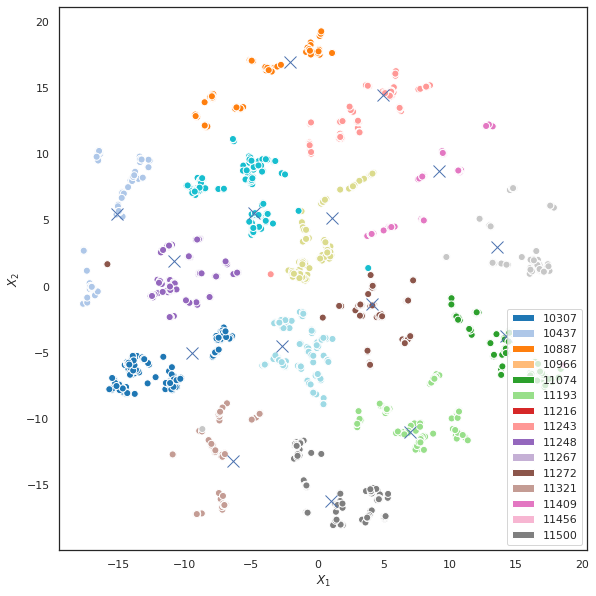

In [80]:
f, ax = plt.subplots(figsize=(16, 10))
# contour = ax.contourf(xx, yy, probs, 25, cmap="tab20c",
#                       vmin=0, vmax=1)
    # Put the result into a color plot
# ax.pcolormesh(xx, yy, Z_encoded, cmap='tab20', alpha=0.3)
# ax_c = f.colorbar(contour)
# ax_c.set_label("$P(y = 1)$")
# ax_c.set_ticks([0, .25, .5, .75, 1])

scat = ax.scatter(X_2d[:,0], X_2d[:, 1], 
           c=y_encoded,  
           label=y,
           s=50,
           cmap="tab20", 
#            vmin=-.2, vmax=1.2,
           edgecolor="white", 
           linewidth=1
)

cmap = plt.get_cmap('tab20')

for label, point in average.items():
    ax.plot(point[0], point[1], 'bx', 
#             color=cmap(np.argwhere(le.classes_ == label)[0][0]),
            markersize=12)

cirs = []
for i in range(0,len(le.classes_)):
    cirs.append(mpatches.Circle((0,0), 50, fc=cmap(i)))
ax.legend(cirs, le.classes_, loc=4)
    
ax.set(aspect="equal",
#        xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
plt.show()

In [81]:
# f.savefig("svm_classifier.png")
# f.savefig("data_visualize.png")
f.savefig("eculidean.png")

In [22]:
plt.figure(figsize=(16,10))
# plt.figure()

sns.scatterplot(
    x="x1", y="x2",
    hue="y",
    s = 100,
    palette=sns.color_palette("hls", NUM_CLASS),
    data=df,
    legend="full",
    alpha=1
)

ValueError: If using all scalar values, you must pass an index

<Figure size 1152x720 with 0 Axes>

In [15]:
np.unique(y_encoded)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])